In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Creatng the dataset

np.random.seed(36)

weight = np.random.randint(20,100,20)  # Weight in kg
height = np.random.randint(80,200,20)  # Height in cm

print(weight)
print(height)

[25 50 60 53 64 29 57 75 26 84 90 90 42 51 21 42 56 34 97 50]
[125 101  93 117 102 126 175 105 147 104 121 197 197 144 154 158 183  99
 168 162]


In [3]:
#stacking the data into a matrix
data = np.column_stack((height, weight))

Text(0, 0.5, 'Weight')

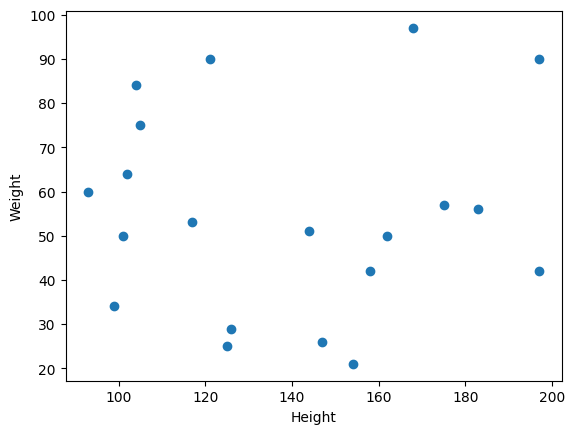

In [4]:
# Plotting the dataset

plt.scatter(height,weight)
plt.xlabel('Height')
plt.ylabel('Weight')

In [5]:
#Calculating the minimum distance between a point and each of the centroids
# This function will return the index of the closest centroid

def min_dist(point, centroids):

  # Compute the Euclidean distances between the given tuple and each of the k tuples
  point = np.array(point)
  distances = np.linalg.norm(centroids - point, axis=1)

  # Find the minimum distance
  min_distance = np.min(distances)

  # Find the index of the centroid with the minimum distance
  min_index = np.argmin(distances)

  return min_index+1

#min_dist((height[0], weight[0]), initial_centroids)

In [6]:
# This function will find the updated centroids
# Return the updated centroids

def find_centroids(data, clusters, num_clusters):
    # Convert clusters to numpy array
    clusters = np.array(clusters)

    # Initialize centroids array
    centroids = np.zeros((num_clusters, data.shape[1]))

    # Calculate the centroid of each cluster
    for cluster in range(1, num_clusters + 1):
        indices = np.where(clusters == cluster)
        cluster_data = data[indices]

        if len(cluster_data) > 0:
            centroids[cluster - 1] = np.mean(cluster_data, axis=0)

    return centroids

In [7]:
# Calculate the distortion function/loss function

def loss(k, clusters, centroids, data):

  dist_sum = 0

  for cluster in range(1, k+1):
    indices = np.where(clusters == cluster)
    cluster_data = data[indices]

    for data_point in cluster_data:
      data_point = np.array([data_point])
      dist_sum += (np.linalg.norm(data_point - centroids[cluster-1],axis=1))

  dist_sum = dist_sum/len(data)

  return dist_sum


For K = 2
Random Choice of initial centroids is: [[197  42]
 [102  64]]


<ipython-input-14-fcde2191be1c>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10')  # Get a color map with k colors


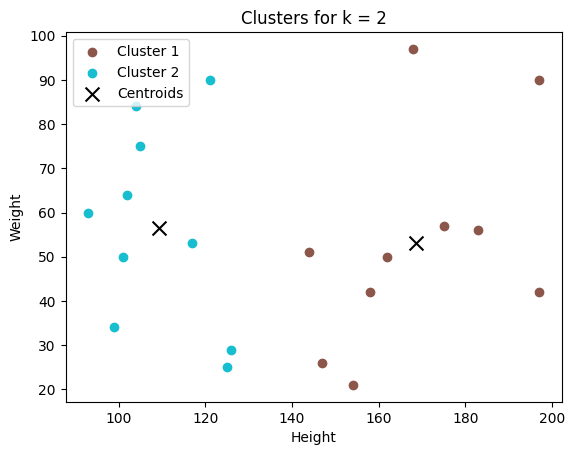

Loss is [24.06000441]
The updated centroids for 2 clusters are: [[168.5  53.2]
 [109.3  56.4]]

For K = 3
Random Choice of initial centroids is: [[154  21]
 [ 93  60]
 [101  50]]


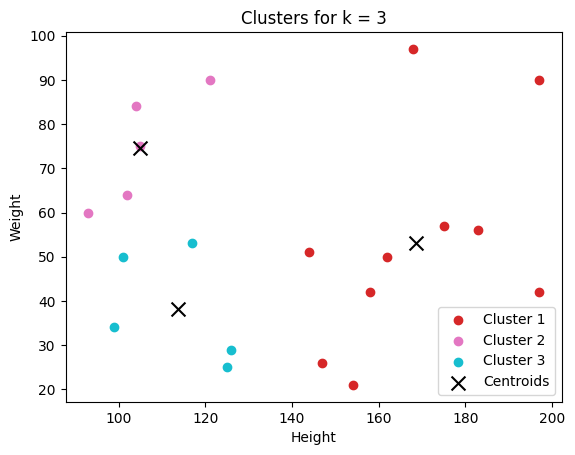

Loss is [20.14727561]
The updated centroids for 3 clusters are: [[168.5  53.2]
 [105.   74.6]
 [113.6  38.2]]

For K = 4
Random Choice of initial centroids is: [[162  50]
 [117  53]
 [168  97]
 [175  57]]


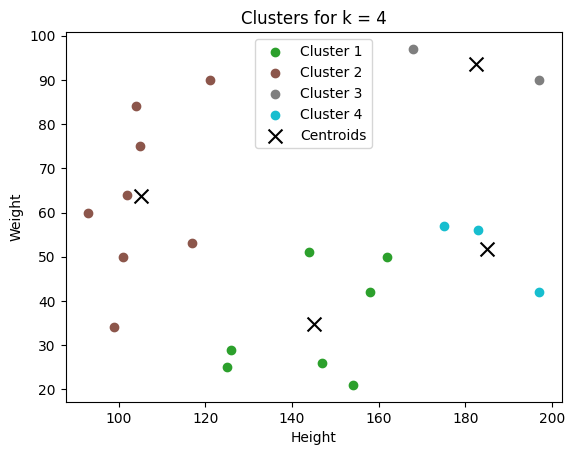

Loss is [16.08902921]
The updated centroids for 4 clusters are: [[145.14285714  34.85714286]
 [105.25        63.75      ]
 [182.5         93.5       ]
 [185.          51.66666667]]

For K = 5
Random Choice of initial centroids is: [[ 93  60]
 [126  29]
 [ 99  34]
 [162  50]
 [197  42]]


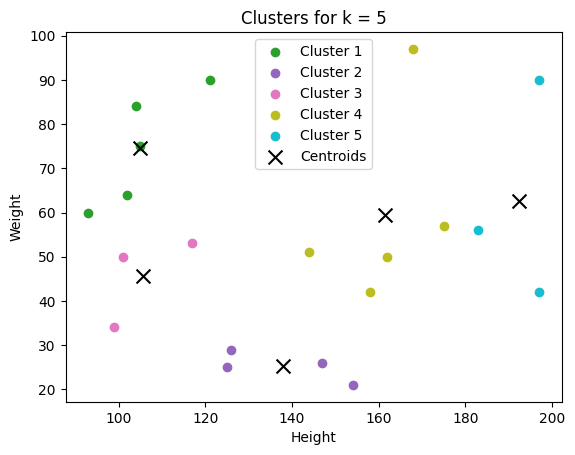

Loss is [15.26403486]
The updated centroids for 5 clusters are: [[105.          74.6       ]
 [138.          25.25      ]
 [105.66666667  45.66666667]
 [161.4         59.4       ]
 [192.33333333  62.66666667]]

For K = 6
Random Choice of initial centroids is: [[ 99  34]
 [105  75]
 [126  29]
 [175  57]
 [147  26]
 [ 93  60]]


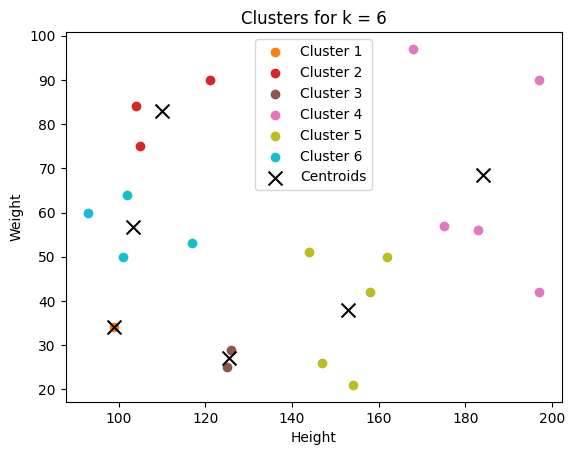

Loss is [12.70946582]
The updated centroids for 6 clusters are: [[ 99.    34.  ]
 [110.    83.  ]
 [125.5   27.  ]
 [184.    68.4 ]
 [153.    38.  ]
 [103.25  56.75]]

For K = 7
Random Choice of initial centroids is: [[101  50]
 [ 99  34]
 [ 93  60]
 [126  29]
 [197  90]
 [125  25]
 [168  97]]


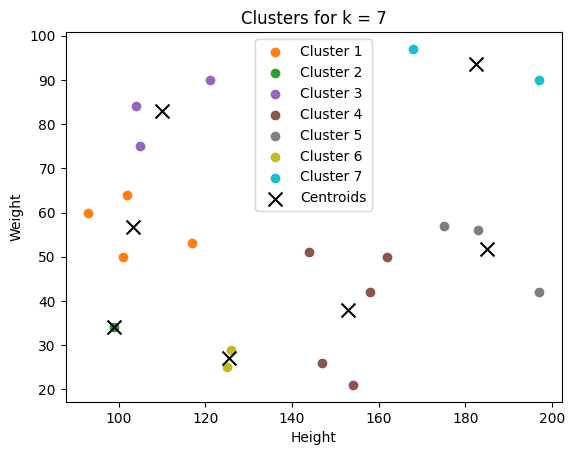

Loss is [10.05818975]
The updated centroids for 7 clusters are: [[103.25        56.75      ]
 [ 99.          34.        ]
 [110.          83.        ]
 [153.          38.        ]
 [185.          51.66666667]
 [125.5         27.        ]
 [182.5         93.5       ]]

For K = 8
Random Choice of initial centroids is: [[105  75]
 [197  90]
 [175  57]
 [158  42]
 [168  97]
 [102  64]
 [197  42]
 [ 93  60]]


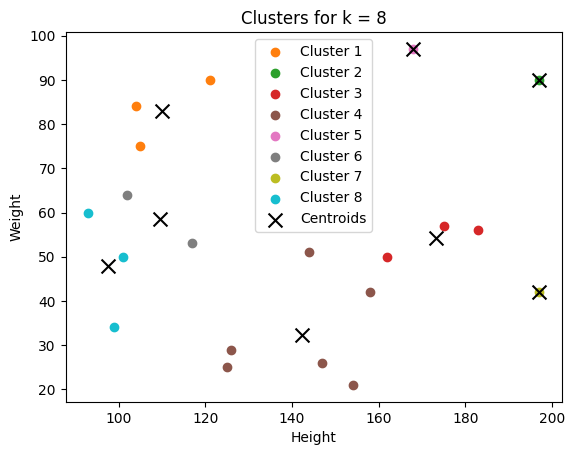

Loss is [9.99212894]
The updated centroids for 8 clusters are: [[110.          83.        ]
 [197.          90.        ]
 [173.33333333  54.33333333]
 [142.33333333  32.33333333]
 [168.          97.        ]
 [109.5         58.5       ]
 [197.          42.        ]
 [ 97.66666667  48.        ]]



In [14]:
# Main code: Here we are initailising centroids and then finding cluster, updation of centroids, finding loss, for each value of k

m = len(weight) # number of training examples
c = np.zeros(m, dtype=int) # it will store which data point belongs to which cluster
loss_arr = [] # it will store loss values for each K for the formation of elbow graph

#Running this loop for each value of k

for k in range(2,9):

  np.random.seed(k)

  # Randomly select k unique indices for initial cluster centroids
  initial_centroid_indices = np.random.choice(range(data.shape[0]), size=k, replace=False)

  # Select the corresponding (height, weight) pairs as initial centroids
  initial_centroids = data[initial_centroid_indices]

  print(f"For K = {k}")
  print(f"Random Choice of initial centroids is: {initial_centroids}")

  updated_centroids = initial_centroids.copy()
  curr_centroids = np.zeros_like(updated_centroids)

  # Running this loop till we are not getting any new centroid positions

  while not np.array_equal(updated_centroids, curr_centroids):

    curr_centroids = updated_centroids.copy()
    for i in range(m):
      c[i] = min_dist((height[i], weight[i]), curr_centroids)

    #updating cebtroids with the newly calculated values of cluster 'c'
    updated_centroids = find_centroids(data, c, k)

  #Calculating Loss
  J = loss(k, c, updated_centroids, data)
  loss_arr.append(J)

  # Create a scatter plot of each cluster with different colors
  plt.figure()
  colors = cm.get_cmap('tab10')  # Get a color map with k colors
  for cluster in range(1, k+1):
      cluster_points = data[c == cluster]
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors(cluster / k), label=f'Cluster {cluster}')

  # Plot the centroids
  plt.scatter(updated_centroids[:, 0], updated_centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
  plt.title(f'Clusters for k = {k}')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()
  plt.show()

  print(f"Loss is {J}")
  print(f"The updated centroids for {k} clusters are: {updated_centroids}")
  print()



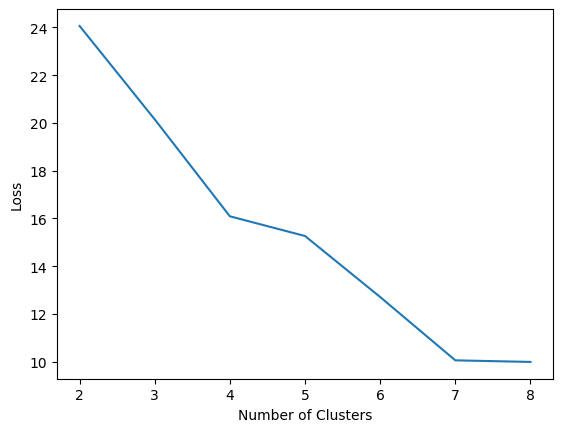

In [15]:
cluster_arr = [i for i in range(2,9)]
plt.plot(cluster_arr, loss_arr)
plt.xlabel("Number of Clusters")
plt.ylabel("Loss")
plt.show()


From the Elbow Curve, we can conclude that the optimal value of k is 7